In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date")

In [3]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
03-01-2012,325.25,332.83,324.97,663.59,"73,80,500"
04-01-2012,331.27,333.87,329.08,666.45,"57,49,400"
05-01-2012,329.83,330.75,326.89,657.21,"65,90,300"
06-01-2012,328.34,328.77,323.68,648.24,"54,05,900"
09-01-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


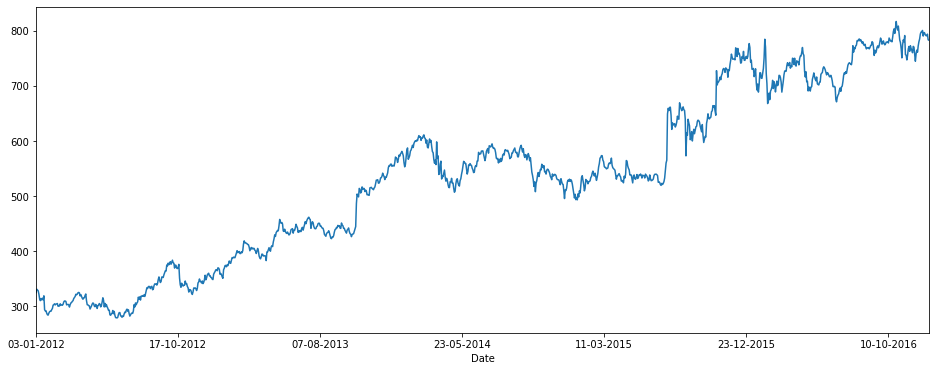

In [4]:
dataset['Open'].plot(figsize=(16,6))

In [5]:
dates = []
prices = []

In [6]:
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)	# skipping column names
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

In [7]:
def predict_price(dates,prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1

    svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
    svr_lin = SVR(kernel= 'linear', C= 1e3, gamma = 'auto')
    svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2, gamma = 'auto')
    svr_rbf.fit(dates, prices) # fitting the data points in the models
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    
    plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints 
    plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
    plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
    plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    
    return svr_rbf.predict(np.array(x).reshape(-1,1))[0], svr_lin.predict(np.array(x).reshape(-1,1))[0], svr_poly.predict(np.array(x).reshape(-1,1))[0]


   


Dates-  [3, 4, 5, 6, 9, 10, 11, 12, 13, 17, 18, 19, 20, 23, 24, 25, 26, 27, 30, 31]
Prices-  [778.81, 788.36, 786.08, 795.26, 806.4, 807.86, 805.0, 807.14, 807.48, 807.08, 805.81, 805.12, 806.91, 807.25, 822.3, 829.62, 837.81, 834.71, 814.66, 796.86]


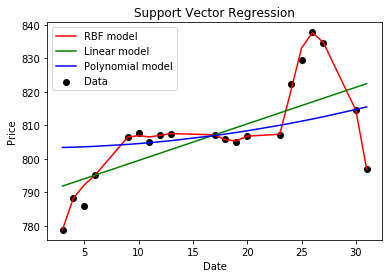


The stock open price for 26th Jan is:
RBF kernel: $ 837.710213377166
Linear kernel: $ 817.0145454545409
Polynomial kernel: $ 811.9077573826698


In [8]:
get_data('Google_Stock_Price_Test.csv') # calling get_data method by passing the csv file to it
print("Dates- ", dates)
print("Prices- ", prices)

predicted_price = predict_price(dates, prices,26)  
print("\nThe stock open price for 26th Jan is:")
print("RBF kernel: $", str(predicted_price[0]))
print("Linear kernel: $", str(predicted_price[1]))
print("Polynomial kernel: $", str(predicted_price[2]))